In [5]:
from sklearn.decomposition import fastica

import sys
sys.path.insert(0, '/home/caiomagno/Documentos/Mestrado/Pesquisa/Testes e execução/Analises/Teste de Léxicos')

from utils import *
from sklearn.naive_bayes  import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from nltk.corpus import stopwords
from nltk import FreqDist


import numpy as np
import seaborn as sns
import nltk

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

lexicon_claudia = load_claudia_freitas_lexicon()
lexicon_LIWC = get_LIWC_lexicon()

all_data = get_data_from_db()
pos_data = get_data_from_db(sentiment="PO")
neg_data = get_data_from_db(sentiment="NG")

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words= stopwords.words("portuguese"))

# Analise da correlação

<IPython.core.display.Javascript object>


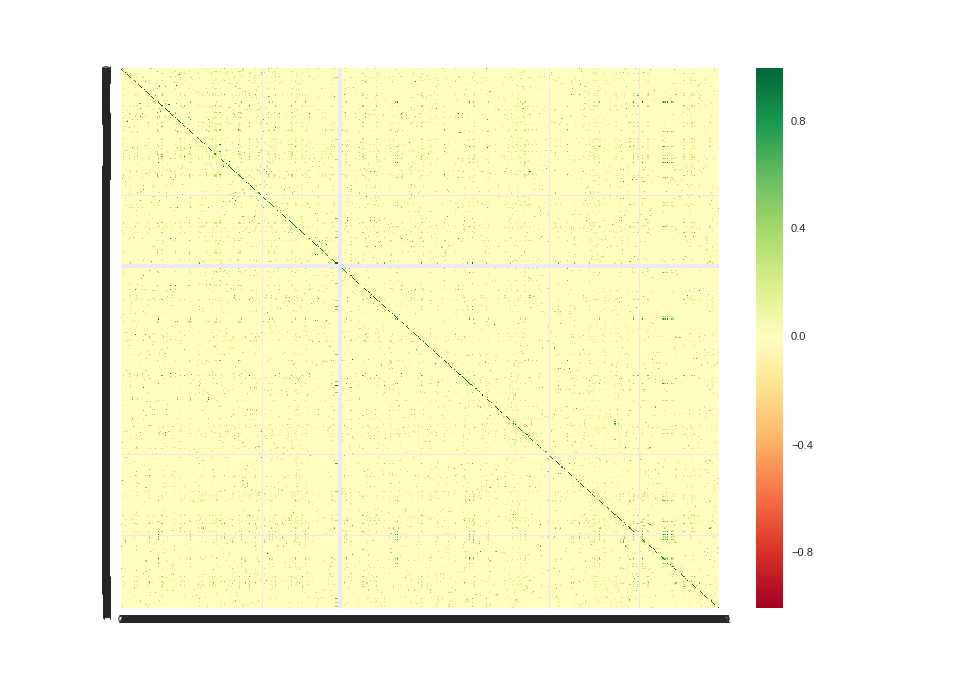

In [7]:
# Utilizando o léxico de cláudia freitas
vectorizer.vocabulary = lexicon_LIWC
pos_matrix = vectorizer.fit_transform(pos_data["texts"])
neg_matrix = vectorizer.fit_transform(neg_data["texts"])
all_matrix = vectorizer.fit_transform(all_data["texts"])

pos_corr = np.corrcoef(all_matrix.toarray())

sns.heatmap(pos_corr, cmap='RdYlGn')

# Aplicação do ICA

In [ ]:
from sklearn.preprocessing import normalize

all_data = all_data[(all_data["texts"] == "PO") | (all_data["texts"] == "NG")]
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words= stopwords.words("portuguese"), vocabulary= lexicon_LIWC)
matrix = vectorizer.fit_transform(pos_data["texts"])

# matrix = normalize(matrix)

K, W, S = fastica(matrix.toarray(), tol = 0.1)

K.shape

<IPython.core.display.Javascript object>


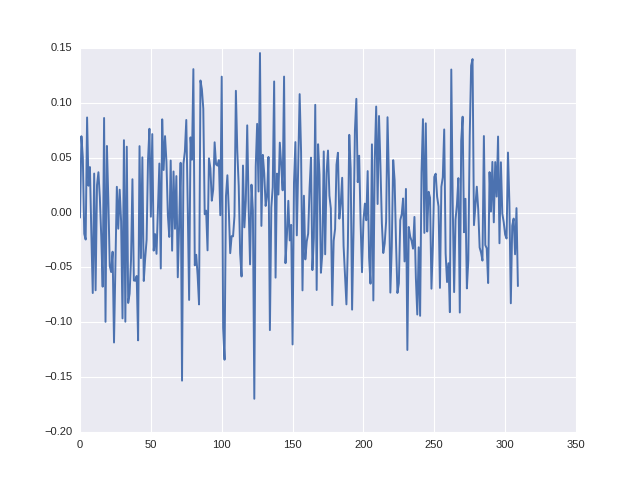

In [51]:
plt.figure()
plt.plot(W[1,:])

# K[100,:].dot(matrix[3,:].toarray().transpose())